In [54]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [55]:
! cp kaggle.json ~/.kaggle/

In [56]:
! chmod 600 ~/.kaggle/kaggle.json

In [57]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [58]:
import pandas as pd

In [59]:
df=pd.read_csv('/content/customer-segmentation-tutorial-in-python.zip')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [61]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [62]:
df.shape

(200, 5)

In [63]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [65]:
df['Gender']=le.fit_transform(df['Gender'])

In [66]:
from tables import Column
x=df.drop(columns='Spending Score (1-100)',axis=1)
x

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17
...,...,...,...,...
195,196,0,35,120
196,197,0,45,126
197,198,1,32,126
198,199,1,32,137


In [67]:
y=df['Spending Score (1-100)']
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [68]:
import seaborn as sb

<Axes: >

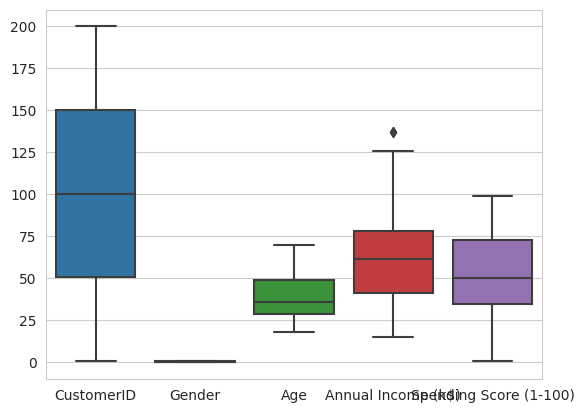

In [69]:
sb.boxplot(df)

<Axes: >

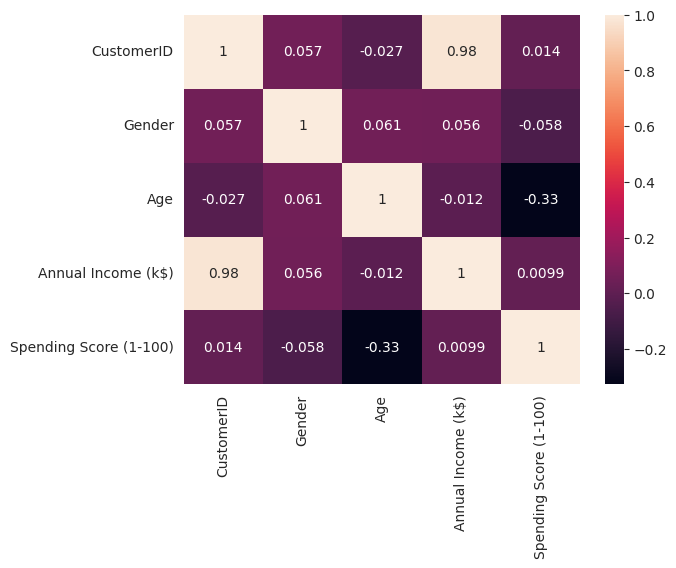

In [70]:
sb.heatmap(df.corr(),annot=True)

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [72]:
df['Gender']=le.fit_transform(df['Gender'])

In [42]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [44]:
sse=[]
for k in range(1,10):
  km=KMeans(n_clusters=k,random_state=2)
  km.fit(x)
  sse.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

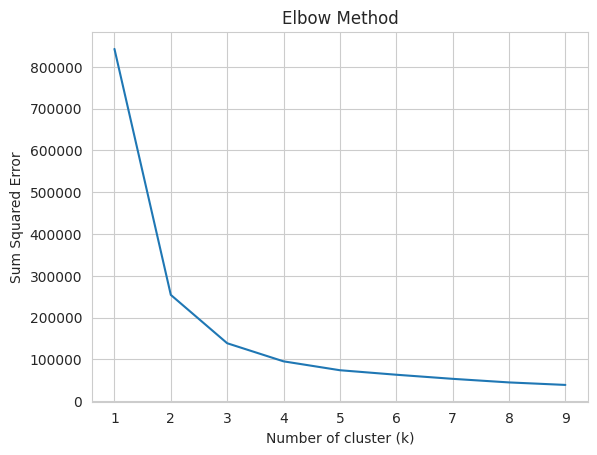

In [45]:
sb.set_style("whitegrid")
g=sb.lineplot(x=range(1,10),y=sse)
g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

In [46]:
kmeans=KMeans(n_clusters=3,random_state=2)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2)

In [47]:
kmeans.cluster_centers_

array([[166.5       ,   0.45588235,  36.04411765,  88.91176471],
       [ 31.01639344,   0.39344262,  36.91803279,  30.36065574],
       [ 96.98591549,   0.46478873,  43.1971831 ,  59.35211268]])

In [48]:
pred=kmeans.fit_predict(x)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

TESTING WITH SOME RANDOM DATA





In [49]:
pred=kmeans.fit_predict([[1,1,1,1],[1,1,3,4],[1,1,5,6]])
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 2], dtype=int32)

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=2)

In [52]:
X_2d = pca.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


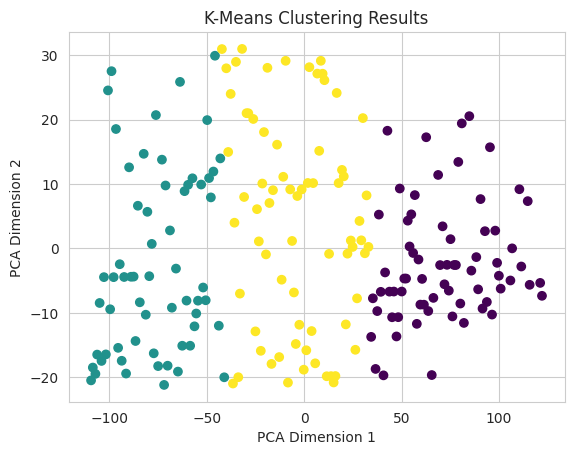

In [53]:
cluster_assignments = kmeans.fit_predict(x)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_assignments, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()